# EDA

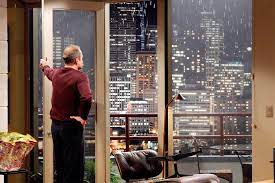

# Buyer
## High budget, wants to show off, timing within a month, waterfront, renovated, high grades year

In [59]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')

In [67]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,13,8570,3480.000,1910,1987.000,98102,47.630,-122.323,3940,8800
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,11,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449
9245,9208900037,2014-09-19,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,13,8860,1030.000,2001,0.000,98039,47.630,-122.240,4540,42730
4407,2470100110,2014-08-04,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,13,6200,3000.000,2001,NaN,98039,47.629,-122.233,3560,24345
1446,8907500070,2015-04-13,5350000.000,5,5.000,8000,23985,2.000,0.000,4.000,...,12,6720,1280.000,2009,0.000,98004,47.623,-122.220,4600,21750


In [ ]:
df.info()

# Data Cleaning
### Data types
For each of the column and transforming the required ones into corrected types
- date from object to date-time format

In [ ]:
df.dtypes

In [ ]:
# change "date" dtype to datetime with format %d/%m/%Y
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [ ]:
type(df['date'][0])

In [ ]:
#check for the duplicates
df.duplicated().value_counts()
#There aren't any 

In [ ]:
df['sqft_basement']

In [ ]:
type(df['sqft_basement'][0])

In [ ]:
df = df.astype({'sqft_basement': float})

In [ ]:
# display rows with "?" in sqft_basement
df.query('sqft_basement == "?"')

#There are 454 values that has '?' as its value (454 rows × 21 columns)

In [10]:
# replacing the '?' with NaN
df['sqft_basement'] = df.sqft_basement.replace('?',np.NaN)
# now changing the data type from object/string to float
df = df.astype({'sqft_basement': float})
df.sqft_basement.dtypes

dtype('float64')

In [ ]:
df.query('sqft_basement.isna()')
#df['sqft_basement']

In [ ]:
#df['price'].sort_values()
df.sort_values('price', ascending = False)


In [42]:
#df.query('waterfront' != 0)
#df['waterfront'].sort_values(ascending = False)
#df["Test"] = np.maximum(df["Open"], df["Close"])
#df.where(df['waterfront'] != 0)
wf_list = df.where(df['waterfront']!= 0).sort_values('price', ascending = False)#.head().index
wf_list


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3910,9808700762.000,2014-06-11,7060000.000,5.000,4.500,10040.000,37325.000,2.000,1.000,2.000,...,11.000,7680.000,2360.000,1940.000,2001.000,98004.000,47.650,-122.214,3930.000,25449.000
1313,7558700030.000,2015-04-13,5300000.000,6.000,6.000,7390.000,24829.000,2.000,1.000,NaN,...,12.000,5000.000,2390.000,1991.000,0.000,98040.000,47.563,-122.210,4320.000,24619.000
1162,1247600105.000,2014-10-20,5110000.000,5.000,5.250,8010.000,45517.000,2.000,1.000,4.000,...,12.000,5990.000,2020.000,1999.000,0.000,98033.000,47.677,-122.211,3430.000,26788.000
8085,1924059029.000,2014-06-17,4670000.000,5.000,6.750,9640.000,13068.000,1.000,1.000,4.000,...,12.000,4820.000,4820.000,1983.000,2009.000,98040.000,47.557,-122.210,3270.000,10454.000
2624,7738500731.000,2014-08-15,4500000.000,5.000,5.500,6640.000,40014.000,2.000,1.000,4.000,...,12.000,6350.000,290.000,2004.000,0.000,98155.000,47.749,-122.280,3030.000,23408.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18453,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2139,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8267,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#df['waterfront'].unique()
#wf_list.query('waterfront.isna()')
#21451 rows × 21 columns

wf_only = wf_list.query('waterfront == 1.0')

#df.query('waterfront.isna()')
#2376 rows × 21 columns

#wf_list.shape


In [63]:
grade_yr = wf_only.where(wf_only['yr_renovated'] != 0).sort_values('grade', ascending = False)

In [66]:
grade_yr.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,1924059029.000,2014-06-17,4670000.000,5.000,6.750,9640.000,13068.000,1.000,1.000,4.000,...,12.000,4820.000,4820.000,1983.000,2009.000,98040.000,47.557,-122.210,3270.000,10454.000
15678,6117502230.000,2014-12-01,1640000.000,3.000,3.500,4660.000,21164.000,2.000,1.000,4.000,...,12.000,4660.000,0.000,1975.000,1990.000,98166.000,47.442,-122.354,3140.000,24274.000
3154,1827200265.000,2014-09-11,1900000.000,2.000,2.750,3690.000,32044.000,2.000,1.000,4.000,...,12.000,3690.000,0.000,1989.000,NaN,98166.000,47.449,-122.369,2310.000,26988.000
11390,3426049284.000,2014-08-19,2300000.000,4.000,3.250,4110.000,15929.000,2.000,1.000,4.000,...,12.000,2720.000,1390.000,2001.000,NaN,98115.000,47.693,-122.271,2640.000,15929.000
3910,9808700762.000,2014-06-11,7060000.000,5.000,4.500,10040.000,37325.000,2.000,1.000,2.000,...,11.000,7680.000,2360.000,1940.000,2001.000,98004.000,47.650,-122.214,3930.000,25449.000
4009,724069059.000,2014-05-09,2400000.000,3.000,2.250,3000.000,11665.000,1.500,1.000,4.000,...,11.000,3000.000,0.000,2001.000,NaN,98075.000,47.588,-122.086,3000.000,15959.000
5744,6744701310.000,2015-04-15,1850000.000,4.000,2.500,3830.000,11972.000,1.000,1.000,4.000,...,11.000,2370.000,1460.000,1981.000,NaN,98155.000,47.740,-122.284,3080.000,12297.000
4214,1025039086.000,2014-09-16,1880000.000,3.000,2.500,3280.000,29111.000,2.000,1.000,3.000,...,11.000,3280.000,0.000,1925.000,NaN,98199.000,47.670,-122.416,3530.000,21074.000
18185,3625059152.000,2014-12-30,3300000.000,3.000,3.250,4220.000,41300.000,1.000,1.000,4.000,...,11.000,2460.000,1760.000,1958.000,1987.000,98008.000,47.608,-122.110,3810.000,30401.000
18440,8043700300.000,2014-06-08,2700000.000,4.000,3.250,4420.000,7850.000,2.000,1.000,4.000,...,11.000,3150.000,1270.000,2001.000,NaN,98008.000,47.572,-122.102,2760.000,8525.000
